<a href="https://colab.research.google.com/github/Murdocksilva/Data-Science---Coder-House/blob/main/Preentrega1_DataScience1_AlfonsoMarrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preentrega 1
#### Data Science I - Coderhouse




## Modelo para aprobación de créditos  bancarios



### Integrantes:
Alfonso Marrero Silva

### Origen del dataset: https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

## Dependencias:


In [67]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [68]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Adquisición de datos

##github

In [69]:
url = 'https://raw.githubusercontent.com/Murdocksilva/Data-Science---Coder-House/main/loan_approval_dataset.csv'
df = pd.read_csv(url)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Descripción de variables



*   no_of_dependents = número de dependientes del solicitante. >=0
*   education = nivel educativo del solicitante [Graduate : graduado , Not Graduate : no graduado]
*   self_employed = trabajador por su propia cuenta [Yes : independiente , No : no independiente]
*   income_annum = ingreso anual. >0
*   loan_amount = monto del préstamo. >0
*   loan_term = meses plazo del préstamo. >0
*   cibil_score = puntaje de solvencia crediticia de los ultimos 6 meses. A mayor puntaje mayor solvencia del solicitante [300,900]
*   residential_assets_value = valor de los activos residenciales. considera deudas hipotecarias.
*   commercial_assets_value = valor de los activos comerciales.
*   luxury_assets_value = valor de los activos de lujo.
*   bank_asset_value = valor de los activos bancarios.
*   loan_status = estado del préstamo. variable target [Approved : aprobado , Rejected : rechazado]

















###### Este es un dataset para predecir aprobaciones de préstamos bancarios. Los bancos buscan la disminución del riesgo al momento de emitir préstamos, por lo tanto, nos encontramos con un dataset de variables que pensamos son relevantes para el modelo como lo son los activos, los ingresos, las cargas,  entre otras. Estas variables son indispensables para determinar la solvencia sus clientes.
##### La incapacidad de pago es el mayor riesgo del emisor. La solución debe estar dirigida hacia un modelo que prediga la emisión de préstamos que conlleve al menor riesgo de impago posible.


#Preguntas o Hipótesis de interés sobre el dataset

1. ¿cual es la correlación entre las diferentes variables?
2. ¿como se distribuyen las variables?
3. ¿como se relaciona el total de activos del solicitante y el monto del préstamo solicitado?
4. ¿como es la relación de ingresos del solicitante con el monto del préstamo?
5. ¿cuales son las medias, maximos, desviaciones y modas de las variables numéricas?
6. ¿que variables son relevantes al modelo?






# Descriptiva

In [70]:
df.shape

(4269, 13)

El dataset obtenido de la base de datos posee 4269 filas y 13 columnas, de las cuales 12 (doce) son variables independientes a analizar y 1 (una) corresponde a la variable target o dependiente

In [71]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

venos el nombre de las columnas del dataset


In [72]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [73]:
df.duplicated().value_counts()

False    4269
Name: count, dtype: int64

El dataset no posee filas repetidas.

In [74]:
df.isna() .sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [75]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


El dataset no posee valores nulos/perdidos , pero el nombre de las columnas contiene un espacio en blanco "" antes del nombre.

In [76]:
df.columns = [col.strip() for col in df.columns]

for col in df.columns:
    print(f"'{col}': {type(col)}")

'loan_id': <class 'str'>
'no_of_dependents': <class 'str'>
'education': <class 'str'>
'self_employed': <class 'str'>
'income_annum': <class 'str'>
'loan_amount': <class 'str'>
'loan_term': <class 'str'>
'cibil_score': <class 'str'>
'residential_assets_value': <class 'str'>
'commercial_assets_value': <class 'str'>
'luxury_assets_value': <class 'str'>
'bank_asset_value': <class 'str'>
'loan_status': <class 'str'>


eliminamos el espacio en blanco "" antes de cada nombre.



In [77]:
print(df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


verifico que el tipo de datos en cada columna siga siendo el correcto

In [78]:
df.describe(include = 'object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


Resumen descriptivo de las variables no numéricas

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


Resumen descriptivo de las variables numéricas. Traspongo para la mejor visualización de los resultados.

In [80]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

medias = df[columnas_numericas].mean()

print(medias.to_string(float_format='{:,.0f}'.format))

no_of_dependents                    2
income_annum                5,059,124
loan_amount                15,133,450
loan_term                          11
cibil_score                       600
residential_assets_value    7,472,617
commercial_assets_value     4,973,155
luxury_assets_value        15,126,306
bank_asset_value            4,976,692


Calculamos la media de las variables numéricas. Podemos decir que en promedio los préstamos son de 11 meses, que en promedio el solicitante tiene 2 dependencias, que el monto promedio de préstamo solicitado es de tres veces el ingreso anual promedio.

In [81]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

moda = df[columnas_numericas].mode().iloc[0]

print("Moda:")
print(moda.to_string(float_format='{:,.0f}'.format))

Moda:
no_of_dependents                    4
income_annum                7,000,000
loan_amount                10,600,000
loan_term                           6
cibil_score                       348
residential_assets_value      400,000
commercial_assets_value             0
luxury_assets_value         2,900,000
bank_asset_value            1,400,000


Calculamos la moda.



In [82]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

maximo = df[columnas_numericas].max()

print(maximo.to_string(float_format='{:,.0f}'.format))

no_of_dependents                   5
income_annum                 9900000
loan_amount                 39500000
loan_term                         20
cibil_score                      900
residential_assets_value    29100000
commercial_assets_value     19400000
luxury_assets_value         39200000
bank_asset_value            14700000


Calculamos los máximos de las variables numéricas


In [83]:
columnas_numericas = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]

mediana_ = df[columnas_numericas].median()

print(mediana_.to_string(float_format='{:,.0f}'.format))


no_of_dependents                    3
income_annum                5,100,000
loan_amount                14,500,000
loan_term                          10
cibil_score                       600
residential_assets_value    5,600,000
commercial_assets_value     3,700,000
luxury_assets_value        14,600,000
bank_asset_value            4,600,000


Calculamos la mediana de las variables numéricas

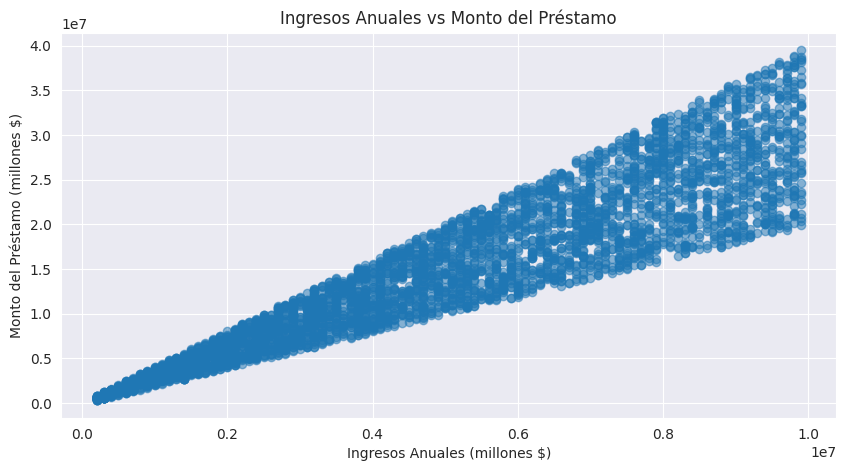

In [84]:
plt.figure(figsize=(10, 5))
plt.scatter(df['income_annum'], df['loan_amount'], alpha=0.5)
plt.title('Ingresos Anuales vs Monto del Préstamo')
plt.xlabel('Ingresos Anuales (millones $)')
plt.ylabel('Monto del Préstamo (millones $)')
plt.show()

Podemos ver la relación entre los montos de los préstamos y el ingreso anual de los solicitantes. a mayor ingreso mayores son los montos.

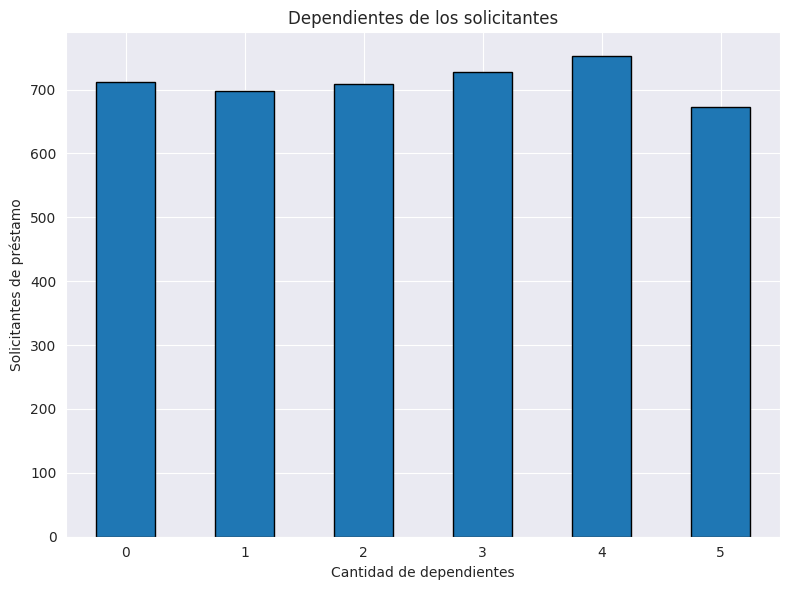

In [85]:
df['no_of_dependents'] = df['no_of_dependents'].astype('category')
ordered_dependents = df['no_of_dependents'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
ordered_dependents.plot(kind='bar', edgecolor='black')
plt.title('Dependientes de los solicitantes')
plt.xlabel('Cantidad de dependientes')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Podemos ver que el número de cargas o dependencias de los solicitantes es bastante pareja entre sí respecto a la totalidad de solicitudes

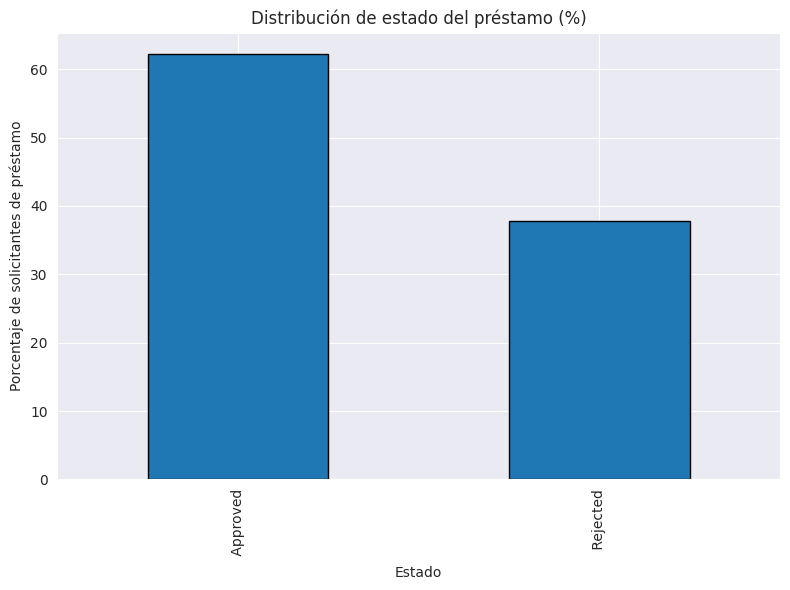

In [86]:
plt.figure(figsize=(8, 6))
df['loan_status'].value_counts(normalize=True).mul(100).plot(kind='bar', edgecolor='black')
plt.title('Distribución de estado del préstamo (%)')
plt.xlabel('Estado')
plt.ylabel('Porcentaje de solicitantes de préstamo')
plt.tight_layout()
plt.show()

vemos la relación % entre aprobados y rechazados

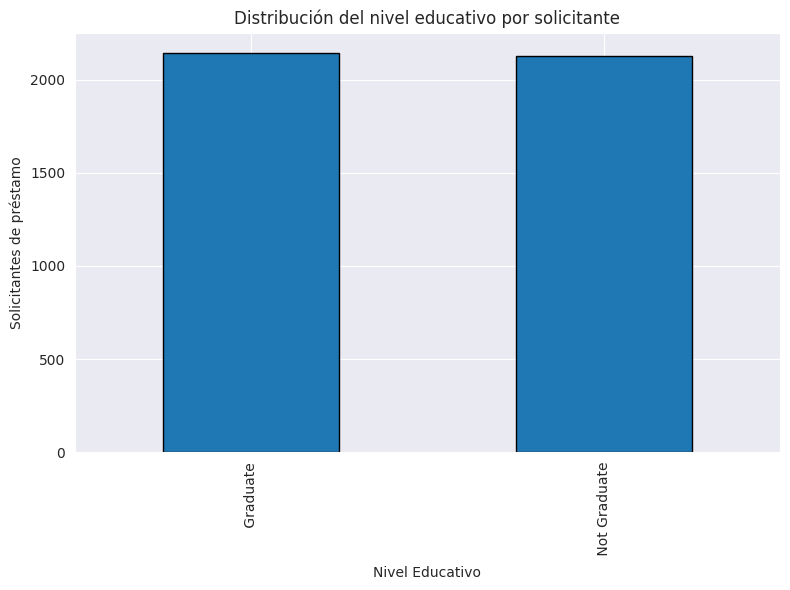

In [87]:
plt.figure(figsize=(8, 6))
df['education'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del nivel educativo por solicitante')
plt.xlabel('Nivel Educativo')
plt.ylabel('Solicitantes de préstamo')
plt.tight_layout()
plt.show()

Podemos ver que la cantidad de graduados y no graduados es pareja


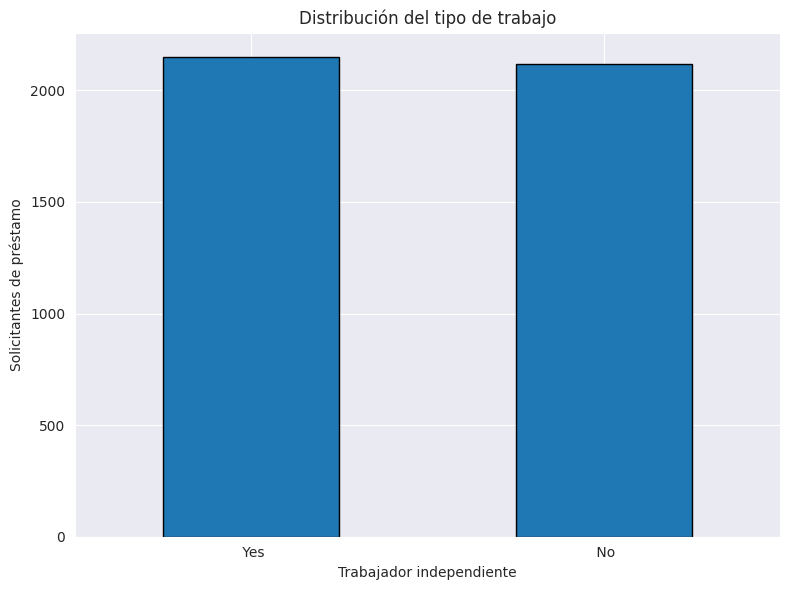

In [88]:
plt.figure(figsize=(8, 6))
df['self_employed'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribución del tipo de trabajo')
plt.xlabel('Trabajador independiente')
plt.ylabel('Solicitantes de préstamo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Vemos que la cantidad de trabajadores dependientes e independientes es bastante pareja tambien

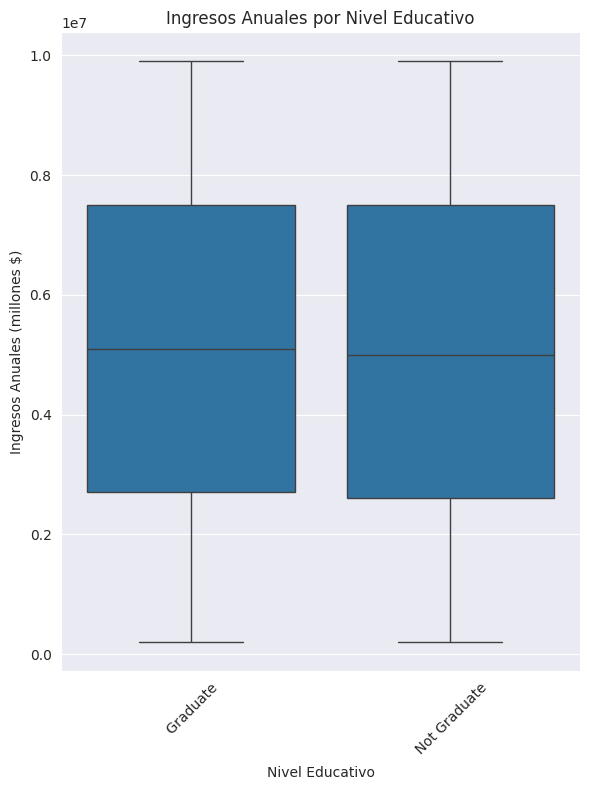

In [89]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='education', y='income_annum', data=df)
plt.title('Ingresos Anuales por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que los niveles de ingreso entre graduados y no graduados son practicamente los mismos.  

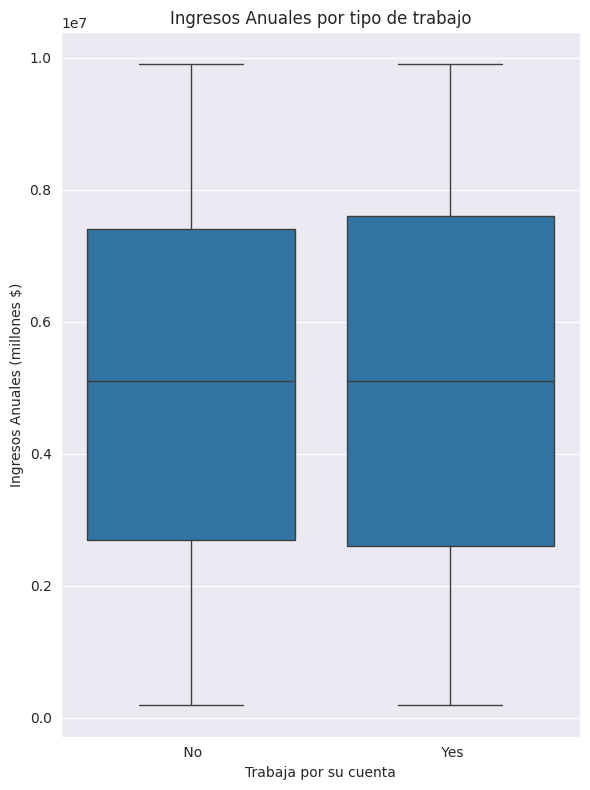

In [90]:
plt.figure(figsize=(6, 8))
sns.boxplot(x='self_employed', y='income_annum', data=df)
plt.title('Ingresos Anuales por tipo de trabajo')
plt.xlabel('Trabaja por su cuenta')
plt.ylabel('Ingresos Anuales (millones $)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Podemos ver que los niveles de ingreso entre trabajadores independientes y dependientes son practicamente los mismos. Los que trabajan por su cuenta, es decir, los independientes pueden tener un nivel de ingreso mas elevado

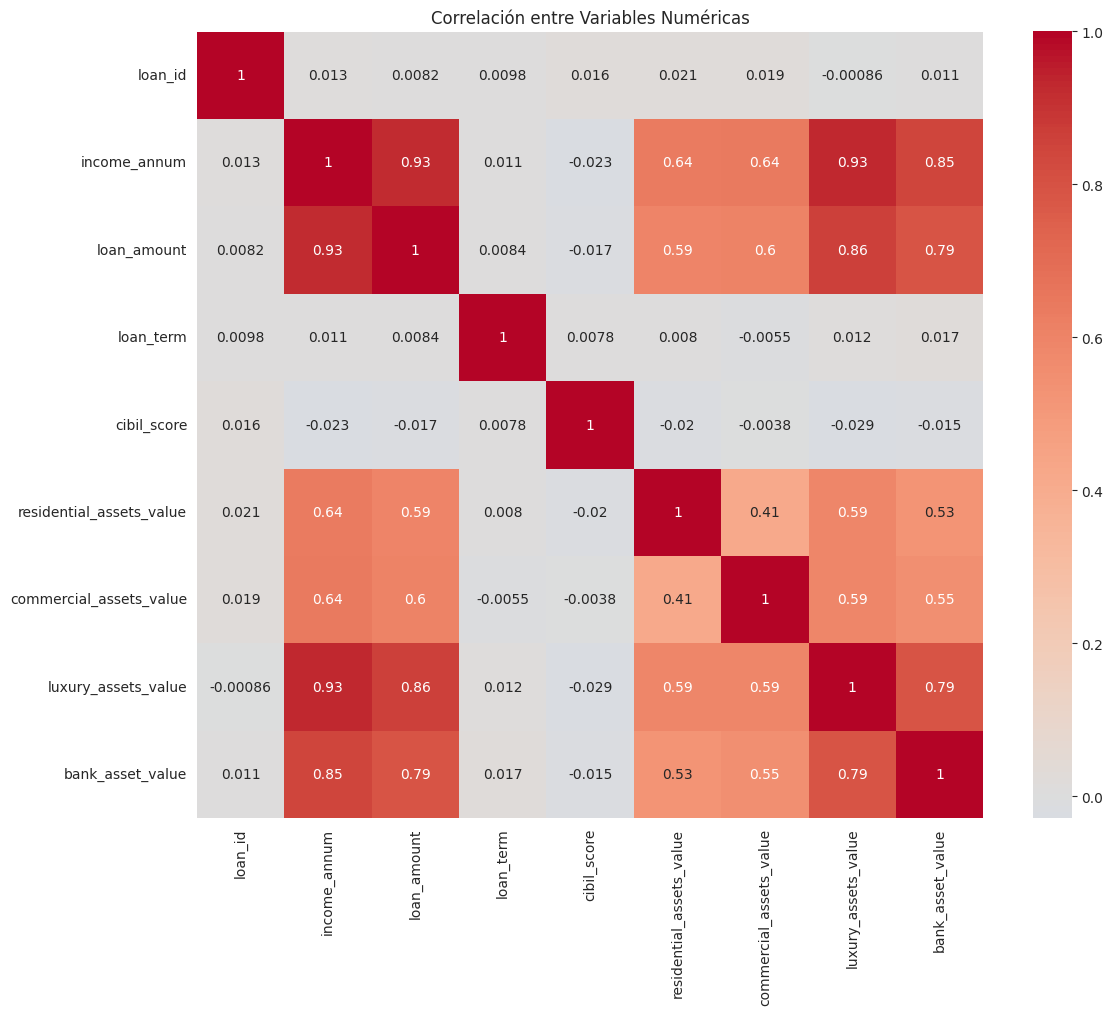

In [91]:
correlaciones = df.select_dtypes(include=['int64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

Vemos la correlación entre las variables numéricas del dataset. Notamos la alta correlación de algunas variables (ingreso anual, activos de lujo) sobre los montos de los préstamos.

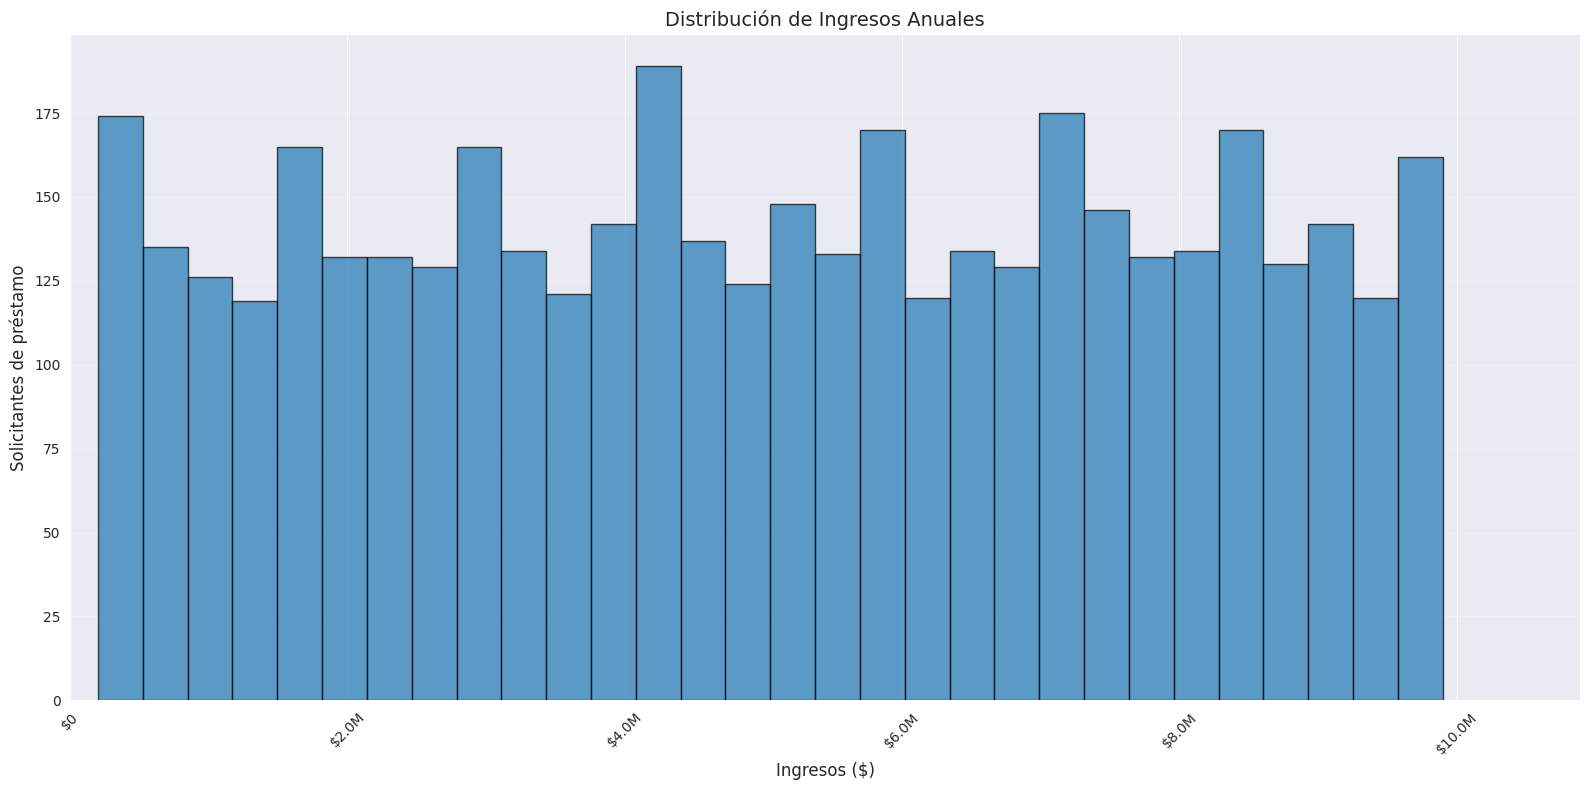

In [92]:
plt.figure(figsize=(16, 8))
plt.hist(df['income_annum'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Ingresos Anuales', fontsize=14)
plt.xlabel('Ingresos ($)', fontsize=12)
plt.ylabel('Solicitantes de préstamo', fontsize=12)
plt.grid(axis='y', alpha=0.3)

def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().xaxis.set_major_formatter(formatter)

max_income = df['income_annum'].max()
plt.xlim(0, max_income * 1.1)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La Distribución del ingreso entre los solicitantes es muy pareja. se realizaron mejoras visuales para el eje X y los datos que suministra.

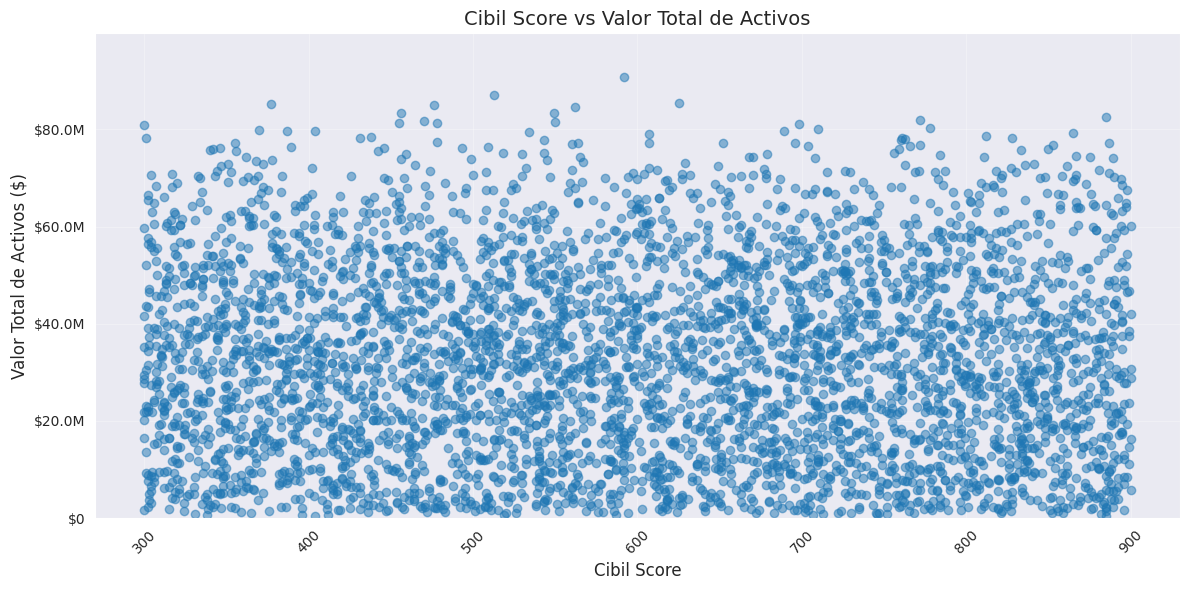

In [93]:
df['total_assets'] = (df['residential_assets_value'] +
                    df['commercial_assets_value'] +
                    df['luxury_assets_value'] +
                    df['bank_asset_value'])

plt.figure(figsize=(12, 6))
plt.scatter(df['cibil_score'], df['total_assets'], alpha=0.5)
plt.title('Cibil Score vs Valor Total de Activos', fontsize=14)
plt.xlabel('Cibil Score', fontsize=12)
plt.ylabel('Valor Total de Activos ($)', fontsize=12)

def currency(x, pos):
    if x >= 1e9:
        s = '${:1.1f}B'.format(x*1e-9)
    elif x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        s = '${:1.0f}K'.format(x*1e-3)
    else:
        s = '${:1.0f}'.format(x)
    return s

formatter = ticker.FuncFormatter(currency)
plt.gca().yaxis.set_major_formatter(formatter)
plt.ticklabel_format(style='plain', axis='x')
max_assets = df['total_assets'].max()
plt.ylim(0, max_assets * 1.1)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Corroboramos lo que vimos en el cuadro de correlación, hay baja correlación entre el indice Cibil Score y el total de activos del solicitante. Parece no haber relación alguna, los datos están muy dispersos.


#Gracias al análisis de los gráficos y estudios realizados he podido entender mejor el dataset. tipos de variable, tamaño del dataset, tendencias, distribuciones, correlaciones entre variables.